### Bayesian Data Analysis, 3rd ed
##  Chapter 3, demo 6

Illustrate posterior inference for Bioassay data (BDA3 p. 74-).

#### Instructions for exercise (3.11 in BDA3)
- Check that the range and spacing of A and B are sensible for the 
  alternative prior
- Compute the log-posterior in a grid
- Scale the log-posterior by subtracting its maximum value before
  exponentiating (think why this is useful)
- Exponentiate
- Normalize the posterior
- Use 2D grid sampling 
- In addition to the plots, report p(beta>0|x,y)

In [1]:
from __future__ import division
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Edit default plot settings (colours from colorbrewer2.org)
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=16)
plt.rc('lines', color='#377eb8', linewidth=2)
plt.rc('axes', color_cycle=('#377eb8','#e41a1c','#4daf4a',
                            '#984ea3','#ff7f00','#ffff33'))

/u/77/ave/unix/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# data
x = np.array([-0.86, -0.30, -0.05, 0.73])
n = np.array([5, 5, 5, 5])
y = np.array([0, 1, 3, 5])

In [4]:
# compute the posterior density in grid
#  - usually should be computed in logarithms!
#  - with alternative prior, check that range and spacing of A and B
#    are sensible
A = np.linspace(-4, 8, 50)
B = np.linspace(-10, 40, 50)
ilogit_abx = 1 / (np.exp(-(A[:,None] + B[:,None,None] * x)) + 1)
p = np.prod(ilogit_abx**y * (1 - ilogit_abx)**(n - y), axis=2)

The following demonstrates an alternative "bad" way of calcuting the posterior density p in a for loop. The vectorised statement above is numerically more efficient. In this small example however, it would not matter that much.

    p = np.empty((len(B),len(A))) # allocate space
    for i in range(len(A)):
        for j in range(len(B)):
            ilogit_abx_ij = (1 / (np.exp(-(A[i] + B[j] * x)) + 1))
            p[j,i] = np.prod(ilogit_abx_ij**y * ilogit_abx_ij**(n - y))

N.B. the vectorised expression can be made even more efficient, e.g. by optimising memory usage with in-place statements, but it would result in a less readable code.

In [5]:
# sample from the grid
nsamp = 1000
samp_indices = np.unravel_index(
    np.random.choice(p.size, size=nsamp, p=p.ravel()/np.sum(p)),
    p.shape
)
samp_A = A[samp_indices[1]]
samp_B = B[samp_indices[0]]
# add random jitter, see BDA3 p. 76
samp_A += (np.random.rand(nsamp) - 0.5) * (A[1]-A[0])
samp_B += (np.random.rand(nsamp) - 0.5) * (B[1]-B[0])

# samples of LD50 conditional beta > 0
bpi = samp_B > 0
samp_ld50 = -samp_A[bpi]/samp_B[bpi]

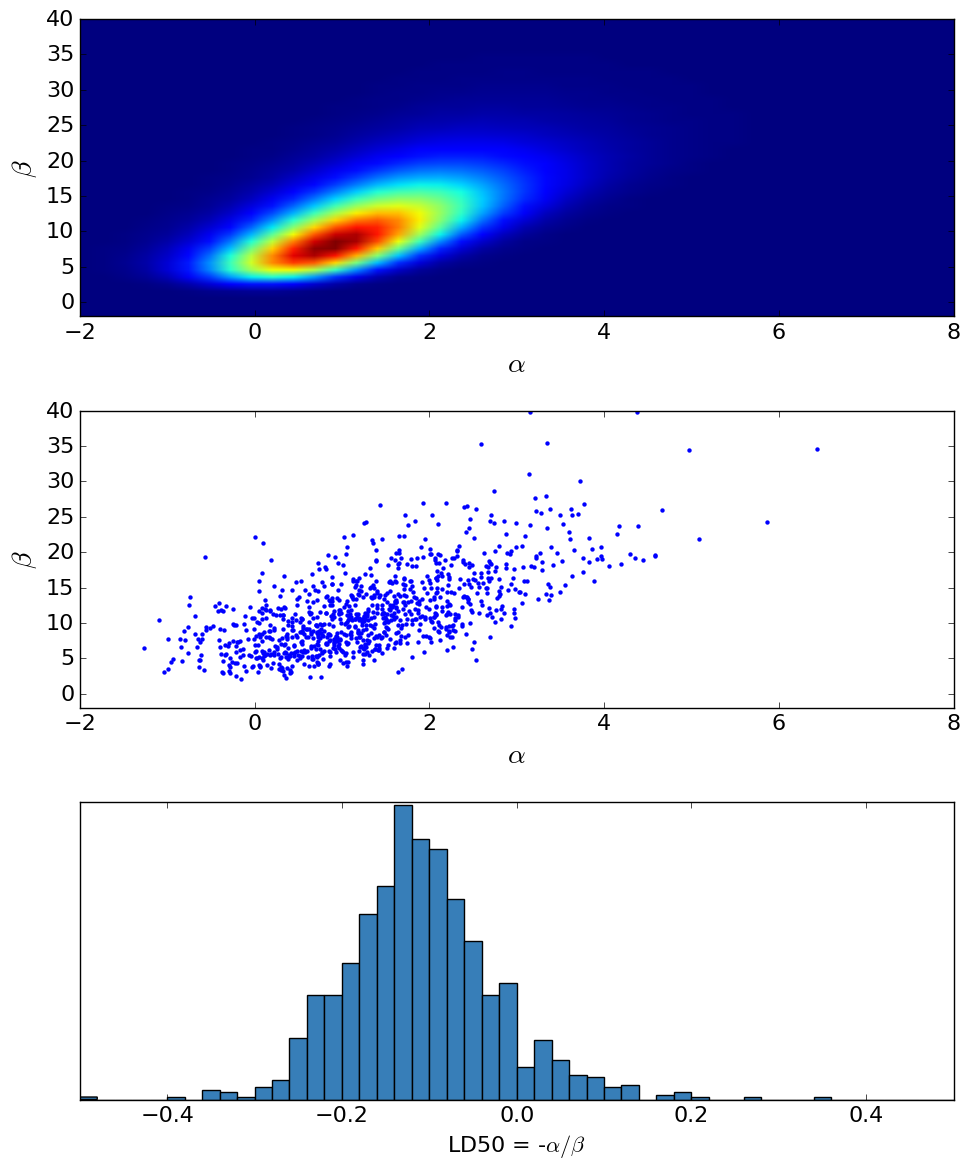

In [6]:
# ====== Plotting

# plot the posterior density
fig = plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.imshow(p, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]))
plt.xlim([-2,8])
plt.ylim([-2,40])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)

# plot the samples
plt.subplot(3,1,2)
plt.scatter(samp_A, samp_B, 10, linewidth=0)
plt.xlim([-2,8])
plt.ylim([-2,40])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)

# plot the histogram of LD50
plt.subplot(3,1,3)
plt.hist(samp_ld50, np.arange(-0.5, 0.51, 0.02))
plt.xlim([-0.5, 0.5])
plt.xlabel(r'LD50 = -$\alpha/\beta$', fontsize=16)
plt.yticks(())
plt.tight_layout();